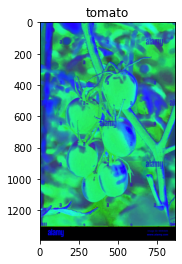

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images/ripness/tomato'
data=[]
categories = ['unmature','mature']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        fruit_img=cv2.imread(imgpath,1)
        hsv = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2HSV)
        plt.imshow(hsv)
        plt.title('tomato')
        plt.show()
        
        try:
            hsv=cv2.resize(hsv,(50,50))
            image=np.array(hsv).flatten()

            data.append([image,label])
        except Exception as e:
            pass
        break
    break

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images/ripness/tomato'
data=[]
categories = ['unmature','mature']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        fruit_img=cv2.imread(imgpath,1)
        hsv = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2HSV)
        
        try:
            hsv=cv2.resize(hsv,(50,50))
            image=np.array(hsv).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))
pick_in=open('tomato_ripness.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

288


In [6]:
pick_in=open('tomato_ripness.pickle','rb')
pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print(features)
print(labels)

[array([42, 85, 74, ..., 44, 62, 98], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 255], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 255], dtype=uint8), array([ 21,  25, 203, ...,  20,  71, 188], dtype=uint8), array([  0,   0, 252, ...,   0,   0, 252], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 255], dtype=uint8), array([ 73, 127, 112, ...,  62, 120, 108], dtype=uint8), array([ 52, 164,  82, ...,  60, 112,  16], dtype=uint8), array([ 44, 114, 227, ...,  44, 253, 127], dtype=uint8), array([ 47,  47, 201, ...,  66, 101, 169], dtype=uint8), array([ 46,  64, 218, ...,  44, 250, 101], dtype=uint8), array([ 53, 113, 119, ...,  57, 153,  69], dtype=uint8), array([ 38, 249, 158, ...,  28, 163,  75], dtype=uint8), array([ 30,  23,  21, ...,  28, 141, 148], dtype=uint8), array([  0,   0, 255, ...,   0,   0, 255], dtype=uint8), array([ 33, 242, 238, ...,  43, 220,  87], dtype=uint8), array([ 11,   8, 251, ...,   8,  11, 255], dtype=uint8), array([ 65,  47, 126, ...,  42,  88,

Accuracy:  0.9444444444444444


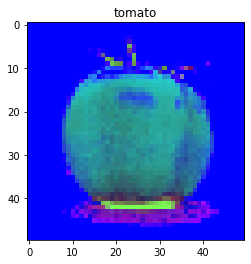

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
joblib.dump(model,'tomato_ripness')
print('Accuracy: ', accuracy)

myfruit=xtest[2].reshape(50,50,-1)

plt.imshow(myfruit)
plt.title('tomato')
plt.show()